# Spatial Model fitting in GLS
In this exercise we will fit a linear model using a Spatial structure as covariance matrix. 
We will use GLS to get better estimators.

As always we will need to load the necessary libraries.

In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
sys.path.append('..')
import django
django.setup()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')
import tools

In [2]:
## Sectionate by coordinates
##minx = -85
##maxx = -80
##miny = 30
##maxy = 35


### PATH information for running in the Biospytial container
#plotdata_path = "/RawDataCSV/idiv_share/plotsClimateData_11092017.csv"
#empirical_data_path = "/apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv"


Use this to automate the process. Be carefull it can overwrite current results

`run ../HEC_runs/fit_fia_logbiomass_logspp_GLS.py /RawDataCSV/idiv_share/plotsClimateData_11092017.csv /apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv -85 -80 30 35`

## Importing data
We will use the FIA dataset and for exemplary purposes we will take a subsample of this data. 
Also important.
The empirical variogram has been calculated for the entire data set using the residuals of an OLS model. 

We will use some auxiliary functions defined in the `fit_fia_logbiomass_logspp_GLS`.
You can inspect the functions using the ?? symbol.

In [3]:
from HEC_runs.fit_fia_logbiomass_logspp_GLS import prepareDataFrame, createVariogram, buildSpatialStructure, calculateGLS

In [4]:
#new_data = prepareDataFrame("/RawDataCSV/idiv_share/plotsClimateData_11092017.csv")
## New "official" dataset
new_data = prepareDataFrame("/RawDataCSV/idiv_share/FIA_Plots_Biomass_11092017.csv")

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reprojecting to Alberts equal area
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Removing possible duplicates. 
 This avoids problems of Non Positive semidefinite


Now we will obtain the data from the calculated empirical variogram.

In [5]:
variogram_data_path = "/apps/external_plugins/spystats/HEC_runs/results/variogram/data_envelope.csv"
thrs_dist = 100000
emp_var_log_log = pd.read_csv(variogram_data_path)

## Instantiating the variogram object

In [6]:
gvg = tools.Variogram(new_data,'logBiomass',using_distance_threshold=thrs_dist)
gvg.envelope = emp_var_log_log
gvg.empirical = emp_var_log_log.variogram
gvg.lags = emp_var_log_log.lags
#emp_var_log_log = emp_var_log_log.dropna()
#vdata = gvg.envelope.dropna()

## Instantiating theoretical variogram model

In [26]:
matern_model = tools.MaternVariogram(sill=0.34,range_a=100000,nugget=0.33,kappa=4)
whittle_model = tools.WhittleVariogram(sill=0.34,range_a=100000,nugget=0.0,alpha=3)
exp_model = tools.ExponentialVariogram(sill=0.34,range_a=100000,nugget=0.33)
gaussian_model = tools.GaussianVariogram(sill=0.34,range_a=100000,nugget=0.33)
spherical_model = tools.SphericalVariogram(sill=0.34,range_a=100000,nugget=0.33)

In [30]:
#gvg.model = whittle_model
#gvg.model = matern_model
models = map(lambda model : gvg.fitVariogramModel(model),[matern_model,whittle_model,exp_model,gaussian_model,spherical_model])


In [31]:
## Modelm
models

[< Matern Variogram : sill 0.340125401705, range 5577.83789733, nugget 0.33, kappa 4 >,
 < Whittle Variogram : sill 0.340288288241, range 40963.3203528, nugget 0.329830410223, alpha1.12279978135 >,
 < Exponential Variogram : sill 0.340294258738, range 38507.8253768, nugget 0.329629457808 >,
 < Gaussian Variogram : sill 0.340237044718, range 44828.0323827, nugget 0.330734960804 >,
 < Spherical Variogram : sill 266491706445.0, range 3.85462485193e+19, nugget 0.337832317845 >]

In [28]:
print(spherical_model)
print(gaussian_model)

< Spherical Variogram : sill 0.34, range 100000, nugget 0.33 >
< Gaussian Variogram : sill 0.340237060967, range 44831.3955259, nugget 0.33073521072 >


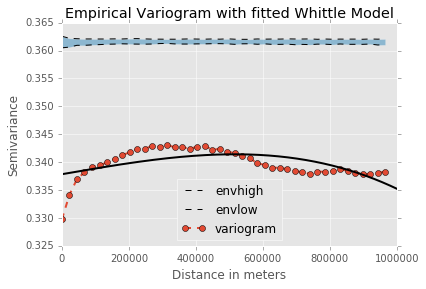

In [22]:
import numpy as np
xx = np.linspace(0,1000000,1000)

gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx),lw=2.0,c='k')
plt.title("Empirical Variogram with fitted Whittle Model")

In [ ]:
import numpy as np
xx = np.linspace(0,1000000,1000)
plt.plot(xx,gvg.model.f(xx))

In [ ]:
gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx))

In [ ]:
type(gvg.model)

In [ ]:
matern_model = tools.MaternVariogram(sill=0.34,range_a=100000,nugget=0.0,kappa=0.5)
whittle_model = tools.WhittleVariogram(sill=0.34,range_a=100000,nugget=0.0,alpha=3)

In [ ]:
plt.plot(xx,whittle_model.f(xx))

In [ ]:
gvg.model = whittle_model


In [ ]:
gvg.fitVariogramModel(whittle_model)

In [ ]:
gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx))

In [ ]:
plt.plot(xx,gvg.model.corr_f(xx))

In [ ]:
expm = tools.ExponentialVariogram(sill=0.34,range_a=100000,nugget=0.2)

In [ ]:
plt.plot(xx,expm.f(xx))
y = expm.f(xx)

In [ ]:
plt.plot(xx,(expm.corr_f(xx)))

In [ ]:
def randomSelection(n,p):
    idxs = np.random.choice(n,p,replace=False)
    random_sample = new_data.iloc[idxs]
    return random_sample
#################
n = len(new_data)
p = 3000 # The amount of samples taken (let's do it without replacement)

In [ ]:
random_sample = randomSelection(n,100)

In [ ]:
random_sample.shape

In [ ]:
secvg = tools.Variogram(random_sample,'logBiomass',model=whittle_model)

In [ ]:
Mdist = secvg.distance_coordinates

In [ ]:
Mdist.shape

In [ ]:
cc = gvg.model.calculateCovarianceMatrixWith(Mdist)

In [ ]:
cc.shape

In [ ]:
np.linalg.cholesky(cc)

In [ ]:
cc.diagonal()

In [ ]:
calculateGLS(random_sample,cc)